In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
train_data.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities      ...           PoolArea  \
count     91     1460        1460      1460      ...        1460.000000   
unique     2        4           4         2      ...                NaN   
top     Grvl      Reg         Lvl    AllPub      ...                NaN   
freq      50      925        1311      1459      ...                NaN   
mean     NaN      NaN         NaN       NaN      ...           2.758904   
std      NaN      NaN         NaN       NaN      ...          40.177307   
min      NaN      NaN         NaN       NaN      ...           0.000000   
25%      NaN      NaN         NaN       NaN      ...           0.000000   
50%      NaN      NaN         NaN       NaN      ...           0.000000   
75%      NaN      NaN         NaN       NaN      ...           0.000000   
max      NaN      NaN         NaN       NaN      ...         738.000000   

       PoolQC  Fence MiscFeature       MiscVal       MoSold       YrSold  \
count       7    281          54   1460.000000  1460.000000  1460.000000   
unique      3      4           4           NaN          NaN          NaN   
top        Gd  MnPrv        Shed           NaN          NaN          NaN   
freq        3    157          49           NaN          NaN          NaN   
mean      NaN    NaN         NaN     43.489041     6.321918  2007.815753   
std       NaN    NaN         NaN    496.123024     2.703626     1.328095   
min       NaN    NaN         NaN      0.000000     1.000000  2006.000000   
25%       NaN    NaN         NaN      0.000000     5.000000  2007.000000   
50%       NaN    NaN         NaN      0.000000     6.000000  2008.000000   
75%       NaN    NaN         NaN      0.000000     8.000000  2009.000000   
max       NaN    NaN         NaN  15500.000000    12.000000  2010.000000   

        SaleType  SaleCondition      SalePrice  
count       1460           1460    1460.000000  
unique         9              6            NaN  
top           WD         Normal            NaN  
freq        1267           1198            NaN  
mean         NaN            NaN  180921.195890  
std          NaN            NaN   79442.502883  
min          NaN            NaN   34900.000000  
25%          NaN            NaN  129975.000000  
50%          NaN            NaN  163000.000000  
75%          NaN            NaN  214000.000000  
max          NaN            NaN  755000.000000  

[11 rows x 81 columns]

In [4]:
#Setting display screen for data frame
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

In [5]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [6]:
train_data.shape

(1460, 81)

In [7]:
#returns Columns list which having Nan values
def ColWithNanData():
    ListOfColNanData = train_data.columns[train_data.isnull().any()].tolist()
    return ListOfColNanData    

In [8]:
train_data[ColWithNanData()].isnull().sum().sort_values()/len(train_data) * 100 

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [9]:
# Features with over 50% of its observations missings will be removed
train_data = train_data.drop(['PoolQC','MiscFeature','Alley','Fence'],axis = 1)

In [10]:
# Function to impute missing values
def feat_impute(column, value):
    train_data.loc[train_data[column].isnull(),column] = value

In [11]:
pd.crosstab(train_data['FireplaceQu'],train_data['Fireplaces'])

Fireplaces     1   2  3
FireplaceQu            
Ex            19   4  1
Fa            28   4  1
Gd           324  54  2
Po            20   0  0
TA           259  53  1

In [12]:
# As we can see that all 690 missing feature of FireplaceQu ressembles with 0 value in Fireplaces ,So We are imputing it with None
feat_impute('FireplaceQu','None')
train_data['FireplaceQu'].isnull().sum()

0

In [13]:
# Check to see if there is a strong correlation with other variables we can use to impute
corr_lf = train_data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

cor_dict_lf = corr_lf['LotFrontage'].to_dict()
sorted(cor_dict_lf.items(), key = lambda x: -abs(x[1]))


[('LotFrontage', 1.0),
 ('1stFlrSF', 0.4571810019946558),
 ('LotArea', 0.4260950187718087),
 ('GrLivArea', 0.40279741408532066),
 ('TotalBsmtSF', 0.39207457637917215),
 ('MSSubClass', -0.3863468853449303),
 ('TotRmsAbvGrd', 0.35209594766022567),
 ('SalePrice', 0.35179909657067854),
 ('GarageArea', 0.34499672410648324),
 ('GarageCars', 0.28569092468510454),
 ('Fireplaces', 0.2666394825603015),
 ('BedroomAbvGr', 0.26316991588106087),
 ('OverallQual', 0.25164577548061245),
 ('BsmtFinSF1', 0.23363316701975517),
 ('PoolArea', 0.20616677527607583),
 ('FullBath', 0.1987686778973781),
 ('MasVnrArea', 0.19345806055826895),
 ('OpenPorchSF', 0.15197222768060648),
 ('BsmtUnfSF', 0.13264374162493386),
 ('YearBuilt', 0.12334946703331695),
 ('BsmtFullBath', 0.10094856694926896),
 ('YearRemodAdd', 0.08886557249206857),
 ('WoodDeckSF', 0.08852093328940891),
 ('2ndFlrSF', 0.0801772706242048),
 ('GarageYrBlt', 0.07024978191661561),
 ('3SsnPorch', 0.07002922773085192),
 ('OverallCond', -0.0592134500052475

In [14]:
#As no other column having strong correlation with LotFrontage, So will replace NaN with Median
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

print('LotFrontage Missing After:', train_data['LotFrontage'].isnull().sum())

LotFrontage Missing After: 0


In [15]:
null_garage = ['GarageYrBlt', 'GarageType', 'GarageFinish','GarageQual','GarageCond']

In [16]:
train_data[null_garage].isnull().sum()

GarageYrBlt     81
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [17]:
# Impute null garage features
for cols in null_garage:
    feat_impute(cols,0)

In [18]:
train_data[['GarageYrBlt', 'GarageType', 'GarageFinish','GarageQual','GarageCond']].isnull().sum()

GarageYrBlt     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [19]:
#validation (House with 0 Garage Cars should have values in null_garage as 0)
for i in null_garage:
    print(pd.crosstab(train_data['GarageCars'],i))

col_0       GarageYrBlt
GarageCars             
0                    81
1                   369
2                   824
3                   181
4                     5
col_0       GarageType
GarageCars            
0                   81
1                  369
2                  824
3                  181
4                    5
col_0       GarageFinish
GarageCars              
0                     81
1                    369
2                    824
3                    181
4                      5
col_0       GarageQual
GarageCars            
0                   81
1                  369
2                  824
3                  181
4                    5
col_0       GarageCond
GarageCars            
0                   81
1                  369
2                  824
3                  181
4                    5


In [20]:
#Checking Basement column missing value
null_Basement = ['BsmtFinType2','BsmtExposure']
train_data[null_Basement].isnull().sum()

BsmtFinType2    38
BsmtExposure    38
dtype: int64

In [21]:
#Checking null_Basement 
train_data[train_data['BsmtFinType2'].isnull()|train_data['BsmtExposure'].isnull()][['BsmtFinType2','BsmtExposure','TotalBsmtSF']]

BsmtFinType2 BsmtExposure  TotalBsmtSF
17            NaN          NaN            0
39            NaN          NaN            0
90            NaN          NaN            0
102           NaN          NaN            0
156           NaN          NaN            0
182           NaN          NaN            0
259           NaN          NaN            0
332           NaN           No         3206
342           NaN          NaN            0
362           NaN          NaN            0
371           NaN          NaN            0
392           NaN          NaN            0
520           NaN          NaN            0
532           NaN          NaN            0
533           NaN          NaN            0
553           NaN          NaN            0
646           NaN          NaN            0
705           NaN          NaN            0
736           NaN          NaN            0
749           NaN          NaN            0
778           NaN          NaN            0
868           NaN          NaN            0
894           NaN          NaN            0
897           NaN          NaN            0
948           Unf          NaN          936
984           NaN          NaN            0
1000          NaN          NaN            0
1011          NaN          NaN            0
1035          NaN          NaN            0
1045          NaN          NaN            0
1048          NaN          NaN            0
1049          NaN          NaN            0
1090          NaN          NaN            0
1179          NaN          NaN            0
1216          NaN          NaN            0
1218          NaN          NaN            0
1232          NaN          NaN            0
1321          NaN          NaN            0
1412          NaN          NaN            0

In [22]:
#As we can observe that at 332 & 948 row in TotalBsmtSF is not 0 , So we replace corresponding row with Mode of that feature
train_data.iloc[332,train_data.columns.get_loc("BsmtFinType2")] = train_data['BsmtFinType2'].mode()[0]

In [23]:
#As we can observe that at 332 & 948 row in TotalBsmtSF is not 0 , So we replace corresponding row with Mode of that feature
train_data.iloc[948,train_data.columns.get_loc("BsmtExposure")] = train_data['BsmtExposure'].mode()[0]

In [24]:
#Impute Null values with None and 0
for i in null_Basement:
    if train_data[i].dtype == np.object:
        feat_impute(i,'None')
    else:
        feat_impute(i,0)

In [25]:
#Checking Basement column with any missing value
null_Basement = ['BsmtFinType2','BsmtExposure']
train_data[null_Basement].isnull().sum()

BsmtFinType2    0
BsmtExposure    0
dtype: int64

In [26]:
#Checking Basement column missing value
null_Basement = ['BsmtQual','BsmtCond','BsmtFinType1']
train_data[null_Basement].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtFinType1    37
dtype: int64

In [27]:
#Checking that missing values for corresponding feature belongs to same rows or not
train_data[train_data['BsmtQual'].isnull() | train_data['BsmtCond'].isnull() | train_data['BsmtFinType1'].isnull() | train_data['TotalBsmtSF'].isnull()][['TotalBsmtSF','BsmtFinType1','BsmtCond','BsmtQual']]

TotalBsmtSF BsmtFinType1 BsmtCond BsmtQual
17              0          NaN      NaN      NaN
39              0          NaN      NaN      NaN
90              0          NaN      NaN      NaN
102             0          NaN      NaN      NaN
156             0          NaN      NaN      NaN
182             0          NaN      NaN      NaN
259             0          NaN      NaN      NaN
342             0          NaN      NaN      NaN
362             0          NaN      NaN      NaN
371             0          NaN      NaN      NaN
392             0          NaN      NaN      NaN
520             0          NaN      NaN      NaN
532             0          NaN      NaN      NaN
533             0          NaN      NaN      NaN
553             0          NaN      NaN      NaN
646             0          NaN      NaN      NaN
705             0          NaN      NaN      NaN
736             0          NaN      NaN      NaN
749             0          NaN      NaN      NaN
778             0          NaN      NaN      NaN
868             0          NaN      NaN      NaN
894             0          NaN      NaN      NaN
897             0          NaN      NaN      NaN
984             0          NaN      NaN      NaN
1000            0          NaN      NaN      NaN
1011            0          NaN      NaN      NaN
1035            0          NaN      NaN      NaN
1045            0          NaN      NaN      NaN
1048            0          NaN      NaN      NaN
1049            0          NaN      NaN      NaN
1090            0          NaN      NaN      NaN
1179            0          NaN      NaN      NaN
1216            0          NaN      NaN      NaN
1218            0          NaN      NaN      NaN
1232            0          NaN      NaN      NaN
1321            0          NaN      NaN      NaN
1412            0          NaN      NaN      NaN

In [28]:
#As we can see that all 3 basement columns missing value matching with corresponding TotalBsmtSF rows with 0 , So replacing it 0 or None
for i in null_Basement:
    if train_data[i].dtype == np.object:
        feat_impute(i,'None')
    else:
        feat_impute(i,0)
        

In [29]:
#Checking Basement column missing value
null_Basement = ['BsmtQual','BsmtCond','BsmtFinType1']
train_data[null_Basement].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtFinType1    0
dtype: int64

In [30]:
#Checking for missing value of MasVnrArea & MasVnrType
null_Masonry = ['MasVnrArea','MasVnrType']

In [31]:
train_data[null_Masonry].isnull().sum()

MasVnrArea    8
MasVnrType    8
dtype: int64

In [32]:
#checking if both above two attributes missing in same row
train_data[train_data['MasVnrArea'].isnull() | train_data['MasVnrType'].isnull()][['MasVnrArea','MasVnrType']]

MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN

In [33]:
#As only 8 values are missing , We replace it with mode
for i in null_Masonry:
    if train_data[i].dtype == np.object:
        feat_impute(i, train_data[i].mode()[0])
    else:
        feat_impute(i, train_data[i].mode()[0])
        

In [34]:
#checking missing value after imputation
train_data[null_Masonry].isnull().sum()

MasVnrArea    0
MasVnrType    0
dtype: int64

In [35]:
#Checking missing values for Electrical column
train_data['Electrical'].isnull().sum()

1

In [36]:
#As only 1 value is missing , we replace it with mode
feat_impute('Electrical',train_data['Electrical'].mode()[0])

In [37]:
#Checking missing values of  Electrical after imputation
train_data['Electrical'].isnull().sum()

0

In [38]:
#Checking if Data frame contains any null values or not
train_data.isnull().any().any()

False

In [39]:
#Checking Categorical features
print('--'*40)
print('Categorical features')
train_data_Categorical_Col = train_data.select_dtypes(include=['object']).columns
print(train_data_Categorical_Col)

--------------------------------------------------------------------------------
Categorical features
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')


In [40]:
#Checking distinct values of in each Categorical value
for i in train_data_Categorical_Col:
    print (train_data[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [41]:
 #As each column of object dataype have varying data types e.g.(strings and/or float), so before label encode convert into str then applying Label Encoding
#le = preprocessing.LabelEncoder()
#for i in train_data_Categorical_Col:
 #   train_data[i] = le.fit_transform(train_data[i].astype(str))


In [42]:
#Combining train_data and test_data vertically to perform Label Encoding
col = []

for i in train_data_Categorical_Col:
     col.append(i)

copy_train_data = pd.DataFrame(columns=col)
copy_test_data = pd.DataFrame(columns=col)


for i in train_data_Categorical_Col:
    copy_train_data[i] = train_data[i]
    copy_test_data[i] = test_data[i]

In [43]:
copy_train_data


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ        None     Attchd          RFn         TA         TA          Y       WD        Normal
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd          Unf         TA         TA          Y       WD       Abnorml
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin     Gable  CompShg     VinylSd     VinylSd       None        TA        TA       Wood       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ        None     Attchd          Unf         TA         TA          Y       WD        Normal
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story     Gable  CompShg     VinylSd     VinylSd      Stone        Gd        TA      PConc       Ex       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          Gd     Attchd          RFn         TA         TA          Y       WD        Normal
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story     Gable  CompShg     HdBoard     HdBoard      Stone        TA        TA     CBlock       Gd       TA           Mn          ALQ          BLQ    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin     Gable  CompShg     BrkFace     Wd Shng       None        T

In [44]:
copy_test_data

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0          RH   Pave      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story     Gable  CompShg     VinylSd     VinylSd       None        TA        TA     CBlock       TA       TA           No          Rec          LwQ    GasA        TA          Y      SBrkr          TA        Typ         NaN     Attchd          Unf         TA         TA          Y       WD        Normal
1          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock       TA       TA           No          ALQ          Unf    GasA        TA          Y      SBrkr          Gd        Typ         NaN     Attchd          Unf         TA         TA          Y       WD        Normal
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd       None        TA        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Gd          Y      SBrkr          TA        Typ          TA     Attchd          Fin         TA         TA          Y       WD        Normal
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        TA        TA      PConc       TA       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          Gd     Attchd          Fin         TA         TA          Y       WD        Normal
4          RL   Pave      IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg     HdBoard     HdBoard       None        Gd        TA      PConc       Gd       TA           No          ALQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ         NaN     Attchd          RFn         TA         TA          Y       WD        Normal
5          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg     HdBoard     HdBoard       None        TA        TA      PConc       Gd       TA           No          Unf          Unf    GasA        Gd          Y      SBrkr          TA        Typ          TA     Attchd          Fin         TA         TA          Y       WD        Normal
6          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     1Story     Gable  CompShg     HdBoard     HdBoard       None        TA        Gd      PConc       Gd       TA           No          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ         NaN     Attchd          Fin         TA         TA          Y       WD        Normal
7          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd       None        TA        TA      PConc       Gd       TA           No          Unf          Unf    GasA        Gd          Y      SBrkr          TA        Typ          Gd     Attchd          Fin         TA         TA          Y       WD        Normal
8          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     1Story     Gable  CompShg     HdBoard     HdBoard       None        T

In [45]:
combined_data = pd.concat([copy_train_data,copy_test_data], ignore_index=True)

In [46]:
combined_data

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ        None     Attchd          RFn         TA         TA          Y       WD        Normal
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd          Unf         TA         TA          Y       WD       Abnorml
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin     Gable  CompShg     VinylSd     VinylSd       None        TA        TA       Wood       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ        None     Attchd          Unf         TA         TA          Y       WD        Normal
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story     Gable  CompShg     VinylSd     VinylSd      Stone        Gd        TA      PConc       Ex       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          Gd     Attchd          RFn         TA         TA          Y       WD        Normal
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story     Gable  CompShg     HdBoard     HdBoard      Stone        TA        TA     CBlock       Gd       TA           Mn          ALQ          BLQ    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin     Gable  CompShg     BrkFace     Wd Shng       None        T

In [47]:
 #As each column of object dataype have varying data types e.g.(strings and/or float), so before label encode convert into str then applying Label Encoding
le = preprocessing.LabelEncoder()
for i in train_data_Categorical_Col:
    le.fit(combined_data[i].astype(str))
    train_data[i] = le.transform(train_data[i].astype(str))
    test_data[i] = le.transform(test_data[i].astype(str))

In [48]:
test_data

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition
0     1461          20         2         80.0    11622       1   NaN         3            3          0          4          0            12           1           2         0           2            5            6       1961          1961          1         1           12           13           2         0.0          3          4           1         4         4             3             5       468.0             3       144.0      270.0        882.0        1          4           1           4       896         0             0        896           0.0           0.0         1         0             2             1            3             5           6           0            6           2       1961.0             3         1.0       730.0           5           5           2         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010         8              4
1     1462          20         3         81.0    14267       1   NaN         0            3          0          0          0            12           2           2         0           2            6            6       1958          1958          3         1           13           14           1       108.0          3          4           1         4         4             3             0       923.0             6         0.0      406.0       1329.0        1          4           1           4      1329         0             0       1329           0.0           0.0         1         1             3             1            2             6           6           0            6           2       1958.0             3         1.0       312.0           5           5           2         393           36              0          0            0         0    NaN    NaN        Gar2    12500       6    2010         8              4
2     1463          60         3         74.0    13830       1   NaN         0            3          0          4          0             8           2           2         0           5            5            5       1997          1998          1         1           12           13           2         0.0          3          4           2         2         4             3             2       791.0             6         0.0      137.0        928.0        1          2           1           4       928       701             0       1629           0.0           0.0         2         1             3             1            3             6           6           1            5           2       1997.0             1         2.0       482.0           5           5           2         212           34              0          0            0         0    NaN  MnPrv         NaN        0       3    2010         8              4
3     1464          60         3         78.0     9978       1   NaN         0            3          0          4          0             8           2           2         0           5            6            6       1998          1998          1         1           12           13          

In [49]:
train_data.astype('float64')

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice
0        1.0        60.0       3.0         65.0    8450.0     1.0       3.0          3.0        0.0        4.0        0.0           5.0         2.0         2.0       0.0         5.0          7.0          5.0     2003.0        2003.0        1.0       1.0         12.0         13.0         1.0       196.0        2.0        4.0         2.0       2.0       4.0           3.0           2.0       706.0           6.0         0.0      150.0        856.0      1.0        0.0         1.0         4.0     856.0     854.0           0.0     1710.0           1.0           0.0       2.0       1.0           3.0           1.0          2.0           8.0         6.0         0.0          3.0         2.0       2003.0           2.0         2.0       548.0         5.0         5.0         2.0         0.0         61.0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0       8.0            4.0   208500.0
1        2.0        20.0       3.0         80.0    9600.0     1.0       3.0          3.0        0.0        2.0        0.0          24.0         1.0         2.0       0.0         2.0          6.0          8.0     1976.0        1976.0        1.0       1.0          8.0          8.0         2.0         0.0        3.0        4.0         1.0       2.0       4.0           1.0           0.0       978.0           6.0         0.0      284.0       1262.0      1.0        0.0         1.0         4.0    1262.0       0.0           0.0     1262.0           0.0           1.0       2.0       0.0           3.0           1.0          3.0           6.0         6.0         1.0          5.0         2.0       1976.0           2.0         2.0       460.0         5.0         5.0         2.0       298.0          0.0            0.0        0.0          0.0       0.0      0.0     5.0  2007.0       8.0            4.0   181500.0
2        3.0        60.0       3.0         68.0   11250.0     1.0       0.0          3.0        0.0        4.0        0.0           5.0         2.0         2.0       0.0         5.0          7.0          5.0     2001.0        2002.0        1.0       1.0         12.0         13.0         1.0       162.0        2.0        4.0         2.0       2.0       4.0           2.0           2.0       486.0           6.0         0.0      434.0        920.0      1.0        0.0         1.0         4.0     920.0     866.0           0.0     1786.0           1.0           0.0       2.0       1.0           3.0           1.0          2.0           6.0         6.0         1.0          5.0         2.0       2001.0           2.0         2.0       608.0         5.0         5.0         2.0         0.0         42.0            0.0        0.0          0.0       0.0      0.0     9.0  2008.0       8.0            4.0   223500.0
3        4.0        70.0       3.0         60.0    9550.0     1.0       0.0          3.0        0.0        0.0        0.0           6.0         2.0         2.0       0.0         5.0          7.0          5.0     1915.0        1970.0        1.0       1.0         13.0         15.0         2.0         0.0        3.0        4.0         0.0       4.0       1.0         

In [50]:
#Checking any categorical value in the data frame and Cofirming Label Encoding
train_data.describe().transpose().shape

(77, 8)

In [51]:
# Confirm encoding
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress = False)
train_data.describe().transpose()

count      mean      std      min       25%       50%       75%       max
Id            1460.00    730.50   421.61     1.00    365.75    730.50   1095.25   1460.00
MSSubClass    1460.00     56.90    42.30    20.00     20.00     50.00     70.00    190.00
MSZoning      1460.00      3.03     0.63     0.00      3.00      3.00      3.00      4.00
LotFrontage   1460.00     69.86    22.03    21.00     60.00     69.00     79.00    313.00
LotArea       1460.00  10516.83  9981.26  1300.00   7553.50   9478.50  11601.50 215245.00
Street        1460.00      1.00     0.06     0.00      1.00      1.00      1.00      1.00
LotShape      1460.00      1.94     1.41     0.00      0.00      3.00      3.00      3.00
LandContour   1460.00      2.78     0.71     0.00      3.00      3.00      3.00      3.00
Utilities     1460.00      0.00     0.03     0.00      0.00      0.00      0.00      1.00
LotConfig     1460.00      3.02     1.62     0.00      2.00      4.00      4.00      4.00
LandSlope     1460.00      0.06     0.28     0.00      0.00      0.00      0.00      2.00
Neighborhood  1460.00     12.25     6.01     0.00      7.00     12.00     17.00     24.00
Condition1    1460.00      2.03     0.87     0.00      2.00      2.00      2.00      8.00
Condition2    1460.00      2.01     0.26     0.00      2.00      2.00      2.00      7.00
BldgType      1460.00      0.49     1.20     0.00      0.00      0.00      0.00      4.00
HouseStyle    1460.00      3.04     1.91     0.00      2.00      2.00      5.00      7.00
OverallQual   1460.00      6.10     1.38     1.00      5.00      6.00      7.00     10.00
OverallCond   1460.00      5.58     1.11     1.00      5.00      5.00      6.00      9.00
YearBuilt     1460.00   1971.27    30.20  1872.00   1954.00   1973.00   2000.00   2010.00
YearRemodAdd  1460.00   1984.87    20.65  1950.00   1967.00   1994.00   2004.00   2010.00
RoofStyle     1460.00      1.41     0.83     0.00      1.00      1.00      1.00      5.00
RoofMatl      1460.00      1.08     0.60     0.00      1.00      1.00      1.00      7.00
Exterior1st   1460.00      9.62     3.20     0.00      8.00     12.00     12.00     14.00
Exterior2nd   1460.00     10.34     3.54     0.00      8.00     13.00     13.00     15.00
MasVnrType    1460.00      1.76     0.61     0.00      1.00      2.00      2.00      3.00
MasVnrArea    1460.00    103.12   180.73     0.00      0.00      0.00    164.25   1600.00
ExterQual     1460.00      2.54     0.69     0.00      2.00      3.00      3.00      3.00
ExterCond     1460.00      3.73     0.73     0.00      4.00      4.00      4.00      4.00
Foundation    1460.00      1.40     0.72     0.00      1.00      1.00      2.00      5.00
BsmtQual      1460.00      2.72     1.28     0.00      2.00      2.00      4.00      4.00
BsmtCond      1460.00      3.69     0.95     0.00      4.00      4.00      4.00      4.00
BsmtExposure  1460.00      2.31     1.16     0.00      2.00      3.00      3.00      4.00
BsmtFinType1  1460.00      3.15     2.25     0.00      1.00      2.00      6.00      6.00
BsmtFinSF1    1460.00    443.64   456.10     0.00      0.00    383.50    712.25   5644.00
BsmtFinType2  1460.00      5.59     1.20     0.00      6.00      6.00      6.00      6.00
BsmtFinSF2    1460.00     46.55   161.32     0.00      0.00      0.00      0.00   1474.00
BsmtUnfSF     1460.00    567.24   441.87     0.00    223.00    477.50    808.00   2336.00
TotalBsmtSF   1460.00   1057.43   438.71     0.00    795.75    991.50   1298.25   6110.00
Heating       1460.00      1.04     0.30     0.00      1.00      1.00      1.00      5.00
HeatingQC     1460.00      1.54     1.74     0.00      0.00      0.00      4.00      4.00
CentralAir    1460.00      0.93     0.25     0.00      1.00      1.00      1.00      1.00
Electrical    1460.00      3.68     1.05     0.00      4.00      4.00      4.00      4.00
1stFlrSF      1460.00   1162.63   386.59   334.00    882.00   1087.00   1391.25   4692.00
2ndFlrSF      1460.00    346.99   436.53     0.00      0

In [52]:
#Regularised Regression
#lasso
X = train_data.drop(['SalePrice'], axis = 1)
Y = train_data['SalePrice']

In [53]:
#splitting training data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test  = train_test_split(X,Y, test_size = .20,random_state = 101)

In [54]:
#lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso  = lasso.fit(X_train,Y_train)
Y_predict = lasso.predict(X_test)

In [55]:
# Score It by checking error R^2 in prediction
from sklearn import metrics
print('R^2 =',metrics.explained_variance_score(Y_test,Y_predict))

R^2 = 0.5903053922831449


In [56]:
#Non Linear Model Learning
X = train_data.drop(['SalePrice'],axis = 1)
Y = train_data['SalePrice']

In [57]:
#selection of top 20 features depending on your pareto principle
from sklearn.feature_selection import SelectPercentile, f_regression
selector_f = SelectPercentile(f_regression, percentile=20)
x_best = selector_f.fit_transform(X, Y)

In [58]:
support = np.asarray(selector_f.get_support())
support

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [59]:
features = np.asarray(X.columns.values)
features

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive',

In [60]:
#top 20% features
top20Percfeatures = features[support]

In [61]:
pd.set_option('display.float_format', '{:.2e}'.format)

In [62]:
fscores = np.asarray(selector_f.scores_)
fscoresfortop20Perc = fscores[support]

In [63]:
fscoresfortop20Perc

array([2436.77059091,  548.66582106,  504.71485472,  419.32846834,
        994.97967794,  793.80688979,  880.34128239,  845.52448774,
       1470.58500996,  668.43029649,  775.26230721,  580.76280082,
        406.5038661 , 1013.70566616,  926.95128727])

In [64]:
pvalues = np.asarray(selector_f.pvalues_)
pvaluesfortop20Perc = pvalues[support]

In [65]:
pvaluesfortop20Perc

array([2.18567527e-313, 2.99022910e-103, 3.16494824e-096, 4.10046104e-082,
       6.42446776e-167, 8.50906072e-140, 9.48422939e-152, 5.39471062e-147,
       4.51803365e-223, 1.23647007e-121, 3.55911618e-137, 2.77228093e-108,
       6.14148746e-080, 2.49864417e-169, 5.26503817e-158])

In [66]:
top20 = pd.DataFrame({'fscore' : fscoresfortop20Perc , 'pvalue' : pvaluesfortop20Perc} , index = top20Percfeatures)

In [67]:
top20.sort_values(by = 'pvalue')

fscore    pvalue
OverallQual  2.44e+03 2.19e-313
GrLivArea    1.47e+03 4.52e-223
GarageCars   1.01e+03 2.50e-169
ExterQual    9.95e+02 6.42e-167
GarageArea   9.27e+02 5.27e-158
TotalBsmtSF  8.80e+02 9.48e-152
1stFlrSF     8.46e+02 5.39e-147
BsmtQual     7.94e+02 8.51e-140
KitchenQual  7.75e+02 3.56e-137
FullBath     6.68e+02 1.24e-121
TotRmsAbvGrd 5.81e+02 2.77e-108
YearBuilt    5.49e+02 2.99e-103
YearRemodAdd 5.05e+02  3.16e-96
MasVnrArea   4.19e+02  4.10e-82
Fireplaces   4.07e+02  6.14e-80

In [68]:
#AS we can see above results
#The top 20% of features are all statistically significant as their p-values are far under .05. This further confirms that these features will be good to use in predicting SalePrice.

In [69]:
#Finding Features that are highly correlated and less correlated with Sales price
best_features = train_data[top20Percfeatures]
corr = best_features.corr()

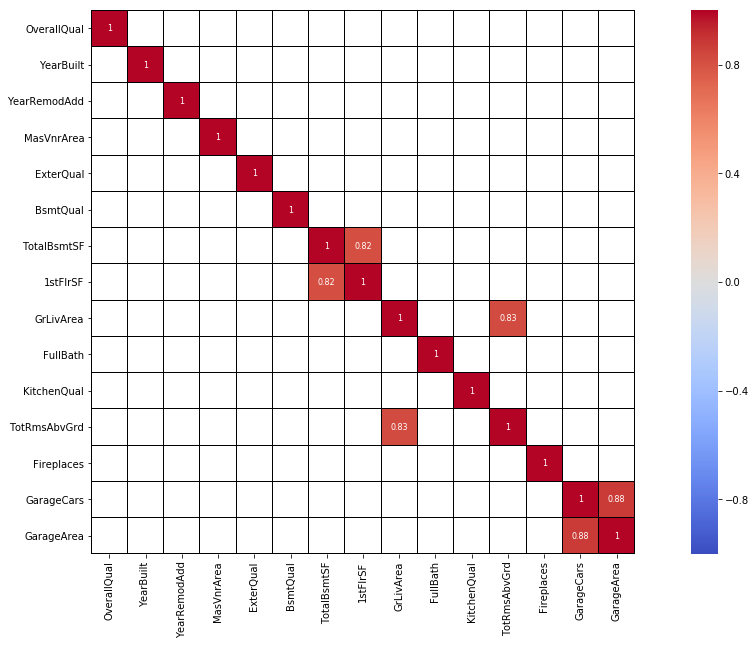

In [70]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,linecolor='Black',
            annot=True, annot_kws={"size": 8}, square=True);

In [71]:
#Finding correlation of TotalBsmtSF and 1stFlrSF with Salesprice
from scipy import stats
print (stats.pearsonr(train_data['TotalBsmtSF'] ,Y)[0])
print (stats.pearsonr(train_data['1stFlrSF'] ,Y)[0])


0.6135805515591953
0.6058521846919146


In [72]:
#Finding correlation of TotRmsAbvGrd and GrLivArea with Salesprice
print (stats.pearsonr(train_data['TotRmsAbvGrd'] ,Y)[0])
print (stats.pearsonr(train_data['GrLivArea'] ,Y)[0])

0.5337231555820281
0.708624477612652


In [73]:
#Finding correlation of GarageCars and GarageArea with Salesprice
print (stats.pearsonr(train_data['GarageCars'] ,Y)[0])
print (stats.pearsonr(train_data['GarageArea'] ,Y)[0])

0.640409197258352
0.6234314389183616


In [74]:
#best_features = best_features.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'],axis = 1)

In [75]:
#We have selected the best feature to predict Saleprice using non-linear model Random forest
X = train_data[best_features.columns]
Y = train_data['SalePrice']

In [76]:
#Splitting into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .20,random_state = 101)

# Fit
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 
rforest.fit(X_train,Y_train)

# Predict
Y_pred = rforest.predict(X_test)


In [77]:
#R^2 Random forest performance check
from sklearn import metrics
print (metrics.explained_variance_score(Y_test,Y_pred))

0.8328904383626311


In [78]:
#cleaning test data
#test_data = pd.read_csv('../data/test.csv')

In [79]:
test_data.describe(include = 'all')

Id  MSSubClass  MSZoning  LotFrontage  LotArea   Street Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal   MoSold   YrSold  SaleType  SaleCondition
count  1.46e+03    1.46e+03  1.46e+03     1.23e+03 1.46e+03 1.46e+03   107  1.46e+03     1.46e+03   1.46e+03   1.46e+03   1.46e+03      1.46e+03    1.46e+03    1.46e+03  1.46e+03    1.46e+03     1.46e+03     1.46e+03   1.46e+03      1.46e+03   1.46e+03  1.46e+03     1.46e+03     1.46e+03    1.46e+03    1.44e+03   1.46e+03   1.46e+03    1.46e+03  1.46e+03  1.46e+03      1.46e+03      1.46e+03    1.46e+03      1.46e+03    1.46e+03   1.46e+03     1.46e+03 1.46e+03   1.46e+03    1.46e+03    1.46e+03  1.46e+03  1.46e+03      1.46e+03   1.46e+03      1.46e+03      1.46e+03  1.46e+03  1.46e+03      1.46e+03      1.46e+03     1.46e+03      1.46e+03    1.46e+03    1.46e+03     1.46e+03    1.46e+03     1.38e+03      1.46e+03    1.46e+03    1.46e+03    1.46e+03    1.46e+03    1.46e+03    1.46e+03     1.46e+03       1.46e+03   1.46e+03     1.46e+03  1.46e+03      3    290          51 1.46e+03 1.46e+03 1.46e+03  1.46e+03       1.46e+03
unique      nan         nan       nan          nan      nan      nan     2       nan          nan        nan        nan        nan           nan         nan         nan       nan         nan          nan          nan        nan           nan        nan       nan          nan          nan         nan         nan        nan        nan         nan       nan       nan           nan           nan         nan           nan         nan        nan          nan      nan        nan         nan         nan       nan       nan           nan        nan           nan           nan       nan       nan           nan           nan          nan           nan         nan         nan          nan         nan          nan           nan         nan         nan         nan         nan         nan         nan          nan            nan        nan          nan       nan      2      4           3      nan      nan      nan       nan            nan
top         nan         nan       nan          nan      nan      nan  Grvl       nan          nan        nan        nan        nan           nan         nan         nan       nan         nan          nan          nan        nan           nan        nan       nan          nan          nan         nan         nan        nan        nan         nan       nan       nan           nan           nan         nan           nan         nan        nan          nan      nan        nan         nan         nan       nan       nan           nan        nan           nan           nan       nan       nan           nan           nan          nan           nan         nan         nan          nan         nan          nan           nan         nan         nan         nan         nan         nan         nan          nan            nan        nan          nan       nan     Ex  MnPrv        Shed      nan      nan      nan       nan            nan
freq        nan         nan       nan          nan      nan      nan    70       nan          nan        nan        nan        nan           nan         nan         nan       nan         nan          nan          nan        nan           nan        nan       nan   

In [80]:
def ColWithNanData():
    ListOfColNanData = test_data.columns[test_data.isnull().any()].tolist()
    return ListOfColNanData    

In [81]:
test_data[ColWithNanData()].isnull().sum().sort_values()/len(test_data) * 100 

BsmtFinSF1     6.85e-02
BsmtFinSF2     6.85e-02
BsmtUnfSF      6.85e-02
TotalBsmtSF    6.85e-02
GarageCars     6.85e-02
GarageArea     6.85e-02
BsmtFullBath   1.37e-01
BsmtHalfBath   1.37e-01
MasVnrArea     1.03e+00
GarageYrBlt    5.35e+00
LotFrontage    1.56e+01
Fence          8.01e+01
Alley          9.27e+01
MiscFeature    9.65e+01
PoolQC         9.98e+01
dtype: float64

In [82]:
Xtest_data = test_data[top20Percfeatures]

In [83]:
#Xtest_data = Xtest_data.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF'],axis = 1)

In [84]:
Xtest_data

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea
0               5       1961          1961    0.00e+00          3         4     8.82e+02       896        896         1            3             5           0    1.00e+00    7.30e+02
1               6       1958          1958    1.08e+02          3         4     1.33e+03      1329       1329         1            2             6           0    1.00e+00    3.12e+02
2               5       1997          1998    0.00e+00          3         2     9.28e+02       928       1629         2            3             6           1    2.00e+00    4.82e+02
3               6       1998          1998    2.00e+01          3         4     9.26e+02       926       1604         2            2             7           1    2.00e+00    4.70e+02
4               8       1992          1992    0.00e+00          2         2     1.28e+03      1280       1280         2            2             5           0    2.00e+00    5.06e+02
5               6       1993          1994    0.00e+00          3         2     7.63e+02       763       1655         2            3             7           1    2.00e+00    4.40e+02
6               6       1992          2007    0.00e+00          3         2     1.17e+03      1187       1187         2            3             6           0    2.00e+00    4.20e+02
7               6       1998          1998    0.00e+00          3         2     7.89e+02       789       1465         2            3             7           1    2.00e+00    3.93e+02
8               7       1990          1990    0.00e+00          3         2     1.30e+03      1341       1341         1            2             5           1    2.00e+00    5.06e+02
9               4       1970          1970    0.00e+00          3         4     8.82e+02       882        882         1            3             4           0    2.00e+00    5.25e+02
10              7       1999          1999    0.00e+00          2         2     1.40e+03      1337       1337         2            2             5           1    2.00e+00    5.11e+02
11              6       1971          1971    5.04e+02          3         4     4.83e+02       483        987         1            3             5           0    1.00e+00    2.64e+02
12              5       1971          1971    4.92e+02          3         4     5.25e+02       525       1092         1            3             6           0    1.00e+00    3.20e+02
13              6       1975          1975    0.00e+00          3         4     8.55e+02       855       1456         2            2             6           1    2.00e+00    4.40e+02
14              7       1975          1975    0.00e+00          3         2     8.36e+02       836        836         1            3             4           0    1.00e+00    3.08e+02
15              9       2009          2010    1.62e+02          0         0     1.59e+03      1627       2334         2            0            10           1    3.00e+00    7.51e+02
16              8       2009          2010    2.56e+02          2         2     1.54e+03      1544       1544         2            2             7           0    3.00e+00    8.68e+02
17              9       2005          2005    6.15e+02          2         0     1.70e+03      1698       1698         2            0             7           1    3.00e+00    7.30e+02
18              8       2005          2006    2.40e+02          2         0     1.82e+03      1822       1822         2            0             8           1    3.00e+00    6.78e+02
19              9       2003          2004    1.10e+03          0         0     2.85e+03      2696       2696         2            0            10           2    3.00e+00    9.58e+02
20              8       2002          2002    2.32e+02          2         2     1.67e+03      1687       2250         2            2             7           1    3

In [85]:
def ColWithNanData():
    ListOfColNanData = Xtest_data.columns[Xtest_data.isnull().any()].tolist()
    return ListOfColNanData  

In [86]:
Xtest_data[ColWithNanData()].isnull().sum().sort_values()/len(Xtest_data) * 100 

TotalBsmtSF   6.85e-02
GarageCars    6.85e-02
GarageArea    6.85e-02
MasVnrArea    1.03e+00
dtype: float64

In [87]:
# Function to impute missing values
def feat_impute(column, value):
    Xtest_data.loc[Xtest_data[column].isnull(),column] = value

In [88]:
if Xtest_data['BsmtQual'].dtype == np.object:
    feat_impute('BsmtQual','None')
else:
    feat_impute('BsmtQual',0)
    

C:\Users\dheeraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [89]:
Xtest_data['MasVnrArea'].isnull()

Xtest_data.iloc[1150, Xtest_data.columns.get_loc('MasVnrArea')] = Xtest_data['MasVnrArea'].mode()[0]

# Impute the remaining nulls with 'None' or zero

if Xtest_data['MasVnrArea'].dtype ==np.object:
    feat_impute('MasVnrArea', 'None')
else:
    feat_impute('MasVnrArea', 0)

C:\Users\dheeraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [90]:
Xtest_data.iloc[1116, Xtest_data.columns.get_loc('GarageCars')] = Xtest_data['GarageCars'].median()
Xtest_data.iloc[1116, Xtest_data.columns.get_loc('GarageArea')] = Xtest_data['GarageArea'].median()

C:\Users\dheeraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [91]:
if Xtest_data['GarageCars'].dtype == np.object:
    feat_impute('GarageCars', 'None')
else:
    feat_impute('GarageCars', 0)

C:\Users\dheeraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [92]:
Xtest_data['TotalBsmtSF'] = Xtest_data['TotalBsmtSF'].mode()[0]

C:\Users\dheeraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
   
Xtest_data['KitchenQual'] = Xtest_data['KitchenQual'].mode()[0]

C:\Users\dheeraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
Xtest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
OverallQual     1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
MasVnrArea      1459 non-null float64
ExterQual       1459 non-null int64
BsmtQual        1459 non-null int64
TotalBsmtSF     1459 non-null float64
1stFlrSF        1459 non-null int64
GrLivArea       1459 non-null int64
FullBath        1459 non-null int64
KitchenQual     1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
Fireplaces      1459 non-null int64
GarageCars      1459 non-null float64
GarageArea      1459 non-null float64
dtypes: float64(4), int64(11)
memory usage: 171.1 KB


In [95]:
#Checking Categorical features
print('--'*40)
print('Categorical features')
Xtest_data_Categorical_Col = Xtest_data.select_dtypes(include=['object']).columns
print(Xtest_data_Categorical_Col)


--------------------------------------------------------------------------------
Categorical features
Index([], dtype='object')


In [96]:
Xtest_data.astype('float64')
# Fit
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 
rforest.fit(best_features,train_data['SalePrice'])

# Predict
Y_pred = rforest.predict(Xtest_data)


In [97]:
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": Y_pred
    })

submission.to_csv('HousingSubmissionbb.csv', index=False)